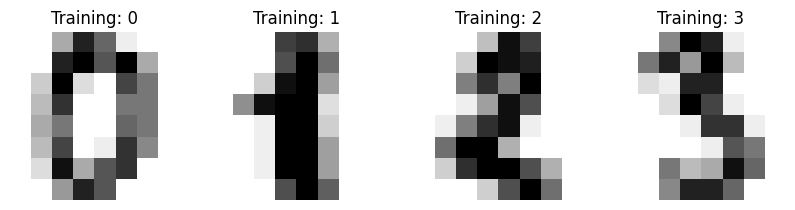

In [59]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5, random_state=42)
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegressionCV(penalty='l2', max_iter=10000)

knn.fit(scaled_X_train, Y_train)
log.fit(scaled_X_train, Y_train)

Y_knn = knn.predict(scaled_X_test)
Y_log = log.predict(scaled_X_test)

print(classification_report(Y_test,Y_log))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.95      0.93      0.94        89
           2       0.94      1.00      0.97        83
           3       0.99      0.88      0.93        93
           4       0.98      0.99      0.98        93
           5       0.97      0.92      0.94        99
           6       0.99      0.98      0.98        98
           7       0.93      0.99      0.96        87
           8       0.90      0.95      0.92        83
           9       0.95      0.96      0.95        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



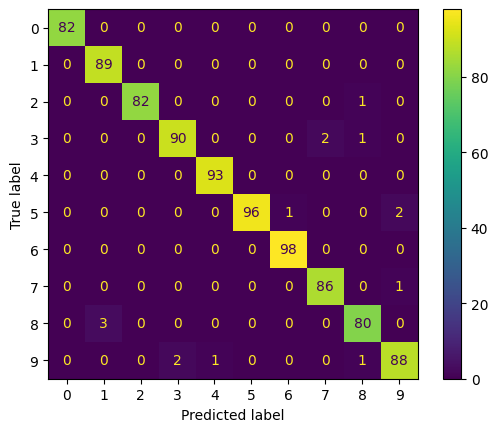

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, Y_knn)
ConfusionMatrixDisplay(cm).plot()

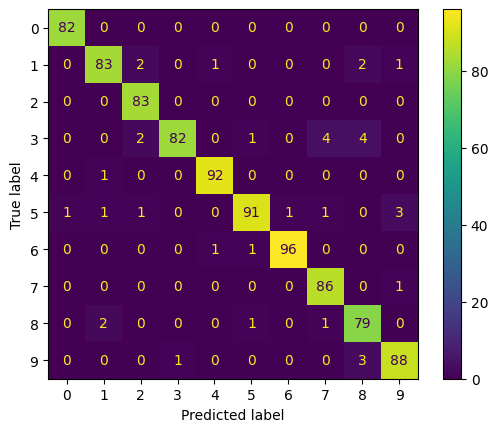

In [62]:
cm = confusion_matrix(Y_test, Y_log)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'Elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

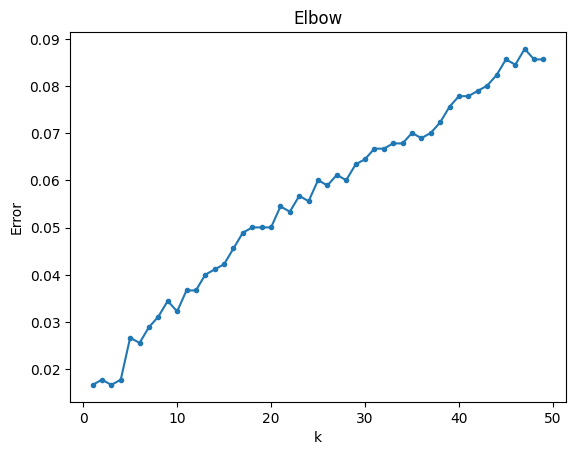

In [66]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(Y_test, Y_knn)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list += [1-accuracy_score(Y_test, Y_hat)]

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,len(error_list)+1), error_list, ".-")
ax.set(title="Elbow", xlabel="k", ylabel="Error")